<a href="https://colab.research.google.com/github/jvrjsanchez/EFIA/blob/main/Projeto3_SA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Engenharia Financeira com Inteligência Artificial</font>
## <font color='blue'>Projeto 3</font>
## <font color='blue'>Portfólio de Investimento com Fronteira Eficiente e Otimização Matemática</font>

## Instalando e Carregando Pacotes

In [53]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [54]:
# Instala o pacote
#!pip install -q yfinance

In [55]:
# Imports
import scipy
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

In [56]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Definindo os Ativos Financeiros Para o Portfólio

In [57]:
# Define os assets e faz o download dos dados
df_dsa = yf.download(['NU',
                      'CRM',
                      'SNOW',
                      'QUBT',
                      'SOFI',
                      'ZETA',
                      'AMD',
                      'IREN',
                      'YELP',
                      'TSM'],
                     start = '2025-06-01', end = '2025-09-29')

[*********************100%***********************]  10 of 10 completed


In [58]:
# Separa a coluna com o valor de fechamento
df_dsa = df_dsa['Close']

In [59]:
# Shape
df_dsa.shape

(82, 10)

In [60]:
# Amostra dos dados
df_dsa.head()

Ticker,AMD,CRM,IREN,NU,QUBT,SNOW,SOFI,TSM,YELP,ZETA
Date,,,,,,,,,,
2025-06-02,114.629997,260.751709,8.73,12.00,11.80,210.169998,13.67,193.519653,37.150002,12.93
2025-06-03,117.309998,263.592285,8.89,11.99,12.40,209.149994,13.66,196.270874,37.500000,13.17
2025-06-04,118.580002,262.296600,9.43,11.94,12.83,209.600006,13.46,201.028412,37.450001,13.20
2025-06-05,115.690002,266.253448,8.95,12.11,11.83,210.100006,13.67,201.962051,36.799999,13.64
2025-06-06,116.190002,273.598969,9.75,12.15,13.70,210.839996,14.24,203.789581,37.000000,13.91


## Calculando a Variação Percentual

In [61]:
# Calcula os retornos
retornos = df_dsa.pct_change()

O método pct_change() calcula a variação percentual entre o elemento atual e o anterior em cada coluna. Por padrão, o cálculo é feito linha a linha (ou seja, ao longo do eixo 0). O primeiro elemento de cada coluna resulta em NaN (Not a Number), pois não há um valor anterior para calcular a variação percentual.

No contexto de análise financeira, essa operação é frequentemente usada para calcular os retornos diários, mensais ou anuais de ativos, como ações ou criptomoedas, a partir de seus preços históricos. Os retornos calculados são úteis para várias análises, incluindo avaliação de desempenho de investimentos, modelagem de risco e otimização de portfólios.

In [62]:
# Drop de valores na
retornos = retornos.dropna()

In [63]:
retornos.tail()

Ticker,AMD,CRM,IREN,NU,QUBT,SNOW,SOFI,TSM,YELP,ZETA
Date,,,,,,,,,,
2025-09-22,0.015249,0.010523,0.084369,0.008040,-0.131500,-0.004078,0.010166,0.029297,-0.002828,0.027455
2025-09-23,0.006947,-0.020545,-0.003103,-0.009202,0.059129,-0.026139,-0.024153,0.036973,-0.011342,-0.024004
2025-09-24,-0.000124,0.005438,0.128561,-0.008669,0.000234,-0.004339,-0.022344,-0.007074,0.001912,-0.045476
2025-09-25,0.002424,-0.020090,-0.018031,-0.014366,-0.038767,-0.004358,-0.011252,-0.014428,-0.004453,-0.012640
2025-09-26,-0.011223,0.010293,-0.095701,0.000000,-0.021137,0.013718,-0.004979,-0.011928,0.005751,0.010340


In [64]:
# Calcula a média
media_retornos = retornos.mean()

In [65]:
print("Média do Retornos Percentuais:")
print(media_retornos)

Média do Retornos Percentuais:
Ticker
AMD     0.004447
CRM    -0.000712
IREN    0.020956
NU      0.003686
QUBT    0.009052
SNOW    0.001250
SOFI    0.009310
TSM     0.004437
YELP   -0.001894
ZETA    0.006876
dtype: float64


## Simulando Diferentes Combinações de Pesos Para os Ativos do Portfólio

In [66]:
# Define a semente aleatória para garantir a reprodutibilidade dos resultados
np.random.seed(42)

In [67]:
# Define o número de portfólios a serem simulados
num_ports = 10000

In [68]:
# Inicializa uma matriz para armazenar os pesos de cada ativo nos portfólios
all_pesos = np.zeros((num_ports, 10))

In [69]:
# Inicializa um array para armazenar os retornos esperados de cada portfólio
ret_arr = np.zeros(num_ports)

In [70]:
# Inicializa um array para armazenar a volatilidade (risco) de cada portfólio
vol_arr = np.zeros(num_ports)

In [71]:
# Inicializa um array para armazenar a relação Sharpe de cada portfólio
sharpe_arr = np.zeros(num_ports)

In [72]:
# Calcula a matriz de covariância
cov_matrix = retornos.cov()

Uma matriz de covariância é uma ferramenta estatística que mede a covariância (ou seja, a medida de como duas variáveis mudam conjuntamente) entre pares de variáveis em um conjunto de dados. Em outras palavras, ela ajuda a entender como duas variáveis se movem em relação uma à outra. No contexto de finanças, por exemplo, é frequentemente usada para analisar como os retornos de diferentes ativos se movem juntos, o que é fundamental para a diversificação e gestão de risco de portfólios de investimento.

## Calculando Retorno Esperado, Volatilidade e Índice de Sharpe

In [73]:
# Loop para calcular retorno esperado, volatilidade esperada e Sharpe Ratio
for x in range(num_ports):

    # Define os pesos
    pesos = np.array(np.random.random(10))
    pesos = pesos / np.sum(pesos)

    # Salva os pesos
    all_pesos[x,:] = pesos

    # Retorno esperado
    ret_arr[x] = np.sum((media_retornos * pesos * len(retornos)))

    # Volatilidade esperada
    vol_arr[x] = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix * len(retornos), pesos)))

    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x] / vol_arr[x]

O loop acima itera por um número definido de portfólios (num_ports), simulando diferentes combinações de pesos para os ativos de cada portfólio, calculando e armazenando suas características principais: retorno esperado, volatilidade e relação Sharpe.

Para cada portfólio (x) dentre o total especificado (num_ports), realiza os seguintes passos:

**Geração de Pesos**: Gera um conjunto aleatório de pesos para 10 ativos em um portfólio. Esses pesos são normalizados para que a soma seja 1, garantindo que o total investido seja distribuído proporcionalmente entre os 10 ativos.

**Armazenamento de Pesos**: Salva os pesos gerados na matriz all_pesos, que mantém um registro dos pesos de cada ativo para cada simulação de portfólio.

**Cálculo do Retorno Esperado**: Calcula o retorno esperado do portfólio multiplicando os retornos médios de cada ativo (media_retornos) pelos pesos e pelo número de retorno (len(retornos)). O resultado é armazenado em ret_arr.

**Cálculo da Volatilidade Esperada**: Utiliza a matriz de covariância dos retornos dos ativos (retornos.cov()) para calcular a volatilidade esperada do portfólio. A matriz de covariância é ajustada pelo número de períodos de retorno e a volatilidade é calculada como a raiz quadrada da variância do portfólio, que é obtida através do produto matricial dos pesos pelo quadrado da matriz de covariância. O resultado é armazenado em vol_arr.

**Cálculo da Relação Sharpe**: Calcula a relação Sharpe para cada portfólio como o quociente entre seu retorno esperado e sua volatilidade. Este valor, armazenado em sharpe_arr, mede o retorno ajustado ao risco de cada portfólio, permitindo identificar aqueles que oferecem o melhor retorno por unidade de risco assumido.

## Interpretando o Sharpe Ratio Máximo

In [74]:
# 5 primeiras linhas de Pesos
all_pesos[:5]

array([[0.07200801, 0.18278161, 0.14073106, 0.11509637, 0.0299957 ,
        0.02999106, 0.01116699, 0.16652855, 0.11556865, 0.13613201],
       [0.00520773, 0.24538041, 0.21060217, 0.05372031, 0.04600045,
        0.04640006, 0.07697116, 0.13275971, 0.10927907, 0.07367894],
       [0.15281528, 0.03483974, 0.07296552, 0.09150188, 0.11390722,
        0.19610414, 0.04987017, 0.12843427, 0.1479604 , 0.01160137],
       [0.11929704, 0.03348399, 0.01277348, 0.18632243, 0.18961076,
        0.15873628, 0.05981372, 0.01917882, 0.13435547, 0.086428  ],
       [0.03016589, 0.12239978, 0.00850029, 0.22476941, 0.06396626,
        0.16376487, 0.07704997, 0.12855247, 0.135138  , 0.04569305]])

In [75]:
# 5 primeiros Retornos
ret_arr[:5]

array([0.44003969, 0.52970523, 0.37512505, 0.35298139, 0.25784874])

In [76]:
# 5 primeiros valores de Volatilidade
vol_arr[:5]

array([0.15458939, 0.17085113, 0.16069525, 0.1948954 , 0.14176382])

In [77]:
# 5 primeiros valores de Sharpe Ratio
sharpe_arr[:5]

array([2.84650639, 3.10039061, 2.33438792, 1.81113249, 1.81886145])

In [78]:
print("Sharpe Ratio Máximo:", sharpe_arr.max())

Sharpe Ratio Máximo: 4.019866595261037


O valor de Sharpe Ratio Máximo indica que o melhor portfólio simulado, dentre as combinações testadas, oferece um retorno ajustado ao risco excepcionalmente alto.

A Relação Sharpe é uma métrica que avalia o desempenho ajustado ao risco de um investimento, comparando seu retorno em excesso (o retorno além da taxa livre de risco) com sua volatilidade.

Uma Relação Sharpe:

- Maior que 1 é considerada boa, indicando que o retorno em excesso do investimento compensa adequadamente pelo risco assumido.
- Maior que 2 é considerada muito boa, sugerindo que o investimento oferece um retorno em excesso significativamente maior por cada unidade de risco.
- Maior que 3 é considerada excepcional, indicando um investimento de alta performance em termos de retorno ajustado ao risco.

Assim, um valor acima coloca o portfólio no patamar de desempenho "muito bom", demonstrando que, para cada unidade de risco assumido, o portfólio gera um retorno substancialmente maior em comparação com portfólios de menor relação Sharpe.

Este é um indicativo de que a combinação de ativos deste portfólio específico, juntamente com a distribuição de seus pesos, foi otimizada de forma eficaz para maximizar o retorno ajustado ao risco. Investidores que buscam um equilíbrio entre risco e retorno podem considerar esse portfólio como uma opção atrativa, dada sua alta eficiência em termos de performance ajustada ao risco.

## Melhores Pesos Atribuídos a Cada Ativo Financeiro com Base no Sharpe Ratio

In [79]:
# Extrai o valor máximo
indice = sharpe_arr.argmax()

In [80]:
# Inicializa o contador
contador = 0

In [81]:
# Inicia um loop para iterar através da lista de símbolos de ações
for i in ('NU','CRM','SNOW','ZETA','AMD','IREN','QUBT','SOFI','YELP','TSM'):

    # Imprime o peso atribuído a cada símbolo de ação no portfólio, arredondando para 3 casas decimais
    print("Peso Atribuído a", i, ": ", round(all_pesos[indice,:][contador], 3))

    # Incrementa o contador para avançar para o próximo peso na lista de pesos do portfólio
    contador += 1

Peso Atribuído a NU :  0.072
Peso Atribuído a CRM :  0.001
Peso Atribuído a SNOW :  0.26
Peso Atribuído a ZETA :  0.087
Peso Atribuído a AMD :  0.025
Peso Atribuído a IREN :  0.026
Peso Atribuído a QUBT :  0.164
Peso Atribuído a SOFI :  0.293
Peso Atribuído a YELP :  0.043
Peso Atribuído a TSM :  0.029


## Gráfico de Retorno x Risco x Sharpe Ratio

In [82]:
# Extrai os valores máximos
max_sr_ret = ret_arr[indice]
max_sr_vol = vol_arr[indice]

In [83]:
max_sr_ret

np.float64(0.7523251156834998)

In [84]:
max_sr_vol

np.float64(0.18715176184463558)

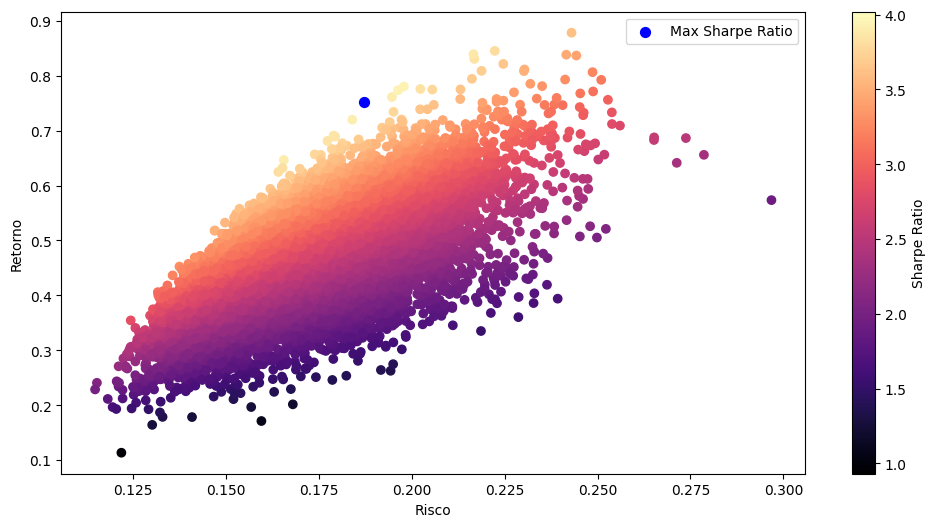

In [85]:
# Plot
plt.figure(figsize = (12,6))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'magma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret, c = 'blue', s = 50, label = 'Max Sharpe Ratio')
plt.legend()
plt.show()

Fizemos o processo manualmente. Agora vamos automatizá-lo para encontrar os melhores valores de pesos que geram o maior valor de Sharpe Ratio.

## Teoria da Média-Variância Para Construir a Fronteira Eficiente

In [86]:
# Define uma função para calcular o retorno, volatilidade e relação Sharpe de um portfólio com base nos pesos
def dsa_get_ret_vol_sr(weights):

    # Converte os pesos de entrada para um array NumPy para facilitar cálculos matemáticos
    weights = np.array(weights)

    # Calcula o retorno esperado do portfólio, multiplicando os retornos médios dos ativos
    # pelos pesos e pelo número de períodos de retorno
    ret = np.sum(media_retornos * weights) * len(retornos)

    # Calcula a volatilidade do portfólio, que é a raiz quadrada do produto matricial dos pesos
    # pelo quadrado da matriz de covariância ajustada pelo número de períodos de retorno
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * len(retornos), weights)))

    # Calcula a relação Sharpe do portfólio, dividindo o retorno pelo nível de volatilidade
    sr = ret / vol

    # Retorna um array NumPy contendo o retorno esperado, volatilidade e relação Sharpe do portfólio
    return np.array([ret, vol, sr])

Para maximizar o índice de sharpe positivo, temos que minimizar o negativo do índice de sharpe porque a função de otimização funciona apenas no valor mínimo de uma função. Isso é essencialmente o que fazemos em qualquer modelo de IA.

In [87]:
# Define uma função para calcular o negativo da relação Sharpe de um portfólio,
# que é usada como função objetivo em processos de otimização
def dsa_neg_sharpe(weights):

    # Chama a função get_ret_vol_sr para os pesos fornecidos,
    # obtém a relação Sharpe (índice [2] do array retornado)
    # e multiplica por -1 para torná-la negativa
    return dsa_get_ret_vol_sr(weights)[2] * -1

In [88]:
# Define uma função para verificar se a soma dos pesos dos ativos em um portfólio é igual a 1,
# o que é uma restrição comum em otimização de portfólio
def dsa_check_sum(weights):

    # Retorna a diferença entre a soma dos pesos fornecidos e 1, o resultado deve ser 0 se os pesos
    # somarem exatamente 1
    return np.sum(weights) - 1

## Definindo as Restrições do Problema de Otimização

In [89]:
# Define uma restrição de igualdade para garantir que a soma dos pesos dos ativos no portfólio seja igual a 1
cons = ({'type': 'eq', 'fun': dsa_check_sum})

In [90]:
# Define os limites para cada peso do portfólio,
# estabelecendo que cada peso pode variar entre 0.0 (0%) e 1.0 (100%)
limite = (0.0, 1.0)

In [91]:
# Cria uma tupla de limites para cada um dos 10 ativos no portfólio, aplicando o limite definido acima a cada um
limites = tuple(limite for asset in range(10))

In [92]:
# Define um palpite inicial para os pesos dos ativos no portfólio, começando com 10% para cada um dos 10 ativos
init_guess = [0.1 for i in range(10)]

## Otimização com SLSQP (Sequential Least Squares Programming)

Veja a descrição de SLSQP no videobook do Capítulo 6.

In [93]:
# Utiliza a função minimize do cipy.optimizse para encontrar os pesos dos ativos que minimizam
# a negação da relação Sharpe, indicando a otimização do portfólio para o máximo retorno ajustado ao risco.
# Usa o método 'SLSQP' (Sequential Least Squares Programming), limites para cada peso do ativo
# e a restrição de que a soma dos pesos deve ser igual a 1.
resultado_otimizacao = minimize(dsa_neg_sharpe,
                                init_guess,
                                method = 'SLSQP',
                                bounds = limites,
                                constraints = cons)

In [94]:
print(resultado_otimizacao)

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -4.306939532152664
           x: [ 6.866e-02  0.000e+00  2.832e-01  0.000e+00  0.000e+00
                0.000e+00  3.487e-01  2.717e-01  2.920e-16  2.767e-02]
         nit: 13
         jac: [-2.754e-05  9.942e-01 -4.251e-04  3.835e-01  1.893e+00
                1.109e+00 -8.107e-04  1.005e-03  1.712e+00  4.693e-03]
        nfev: 150
        njev: 13
 multipliers: [-1.185e-04]


Os resultados da otimização indicam um sucesso na busca pelos pesos ótimos dos ativos em um portfólio que maximiza a relação Sharpe, ajustando-se pelo risco. Aqui está o que cada elemento do resultado significa:

**message: "Optimization terminated successfully"** - A otimização terminou com sucesso, o que significa que o processo de otimização encontrou uma solução sem enfrentar erros significativos.

**success: True** - Confirma que a otimização foi bem-sucedida.

**status: 0** - Um código de status de 0 geralmente indica uma conclusão bem-sucedida do algoritmo de otimização.

**fun**: O valor da função objetivo (negativo da relação Sharpe) no ótimo encontrado. O valor negativo é usado por convenção na otimização para transformar um problema de maximização (maximizar a relação Sharpe) em minimização (minimizar o negativo da relação Sharpe). O valor real da relação Sharpe é o positivo deste número.

**x:** Array que mostra a distribuição de pesos ótimos para cada um dos 10 ativos no portfólio. Valores próximos a zero indicam que o ativo correspondente tem pouca ou nenhuma participação no portfólio otimizado.

**nit:** O número de iterações do algoritmo até encontrar a solução ótima.

**jac**: Array que mostra o gradiente da função objetivo (negativo da relação Sharpe) em relação aos pesos no ponto ótimo. Esses valores ajudam a entender a sensibilidade da relação Sharpe a mudanças nos pesos dos ativos próximos ao ótimo.

**nfev:** O número de avaliações da função objetivo que o algoritmo realizou. Isso dá uma ideia do esforço computacional envolvido.

**njev:** O número de avaliações do jacobiano (ou gradiente) da função objetivo, indicando quantas vezes o gradiente foi calculado durante a otimização.

Interpretando estes resultados, você pode concluir que a otimização foi bem-sucedida e resultou em um portfólio que maximiza a relação Sharpe, indicando um alto retorno ajustado ao risco. A distribuição de pesos sugere uma concentração do investimento em poucos ativos espcificamente, com os demais ativos recebendo pouca ou nenhuma alocação.

## Construção, Plot e Interpretação da Fronteira Eficiente

In [95]:
# Extraindo os valores de x (melhores pesos)
resultado_otimizacao.x

array([6.86594767e-02, 0.00000000e+00, 2.83199098e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.48727689e-01, 2.71747438e-01,
       2.92037640e-16, 2.76662980e-02])

In [96]:
# Aplica a função e calcula retorno, volatilidade e sharpe ratio
dsa_get_ret_vol_sr(resultado_otimizacao.x)

array([0.88149953, 0.20466959, 4.30693953])

In [97]:
# Define os valores para as coordenadas da fronteira em y
frontier_y = np.linspace(0.0, 0.60, num = 200)

In [98]:
# Função para retornar a volatilidade
def dsa_retorna_volatilidade(weights):
    return dsa_get_ret_vol_sr(weights)[1]

A função acima é definida para retornar a volatilidade do portfólio de investimentos, que é calculada com base nos pesos dos ativos dentro desse portfólio. Essa função utiliza outra função chamada dsa_get_ret_vol_sr(weights), que calcula três características importantes de um portfólio com base nos pesos dos ativos: o retorno esperado do portfólio ([0]), a volatilidade do portfólio ([1]) e a relação Sharpe do portfólio ([2]). A função dsa_minimize_volatility() é focada especificamente na volatilidade, por isso retorna o segundo elemento do array resultante da função dsa_get_ret_vol_sr, correspondente à volatilidade ([1]).

In [99]:
# Lista para os valores das coordenadas da fronteira em x
frontier_x = []

In [100]:
# Inicia um loop para iterar por uma lista de retornos esperados (frontier_y),
# que faz parte da construção da fronteira eficiente
for retorno_possivel in frontier_y:

    # Define restrições para a otimização: uma garante que a soma dos pesos seja 1 (check_sum)
    # e a outra garante que o retorno esperado do portfólio seja igual ao retorno possível atual na iteração
    cons = ({'type':'eq', 'fun': dsa_check_sum},
            {'type':'eq', 'fun': lambda w: dsa_get_ret_vol_sr(w)[0] - retorno_possivel})

    # Realiza a otimização para minimizar a volatilidade (risco) do portfólio sob as restrições definidas,
    # usando um palpite inicial (init_guess), método 'SLSQP', limites definidos para os pesos (bounds)
    # e as restrições (cons)
    resultado = minimize(dsa_retorna_volatilidade,
                         init_guess,method = 'SLSQP',
                         bounds = limites,
                         constraints = cons)

    # Após a otimização, adiciona o resultado (valor mínimo da função, que é a volatilidade mínima para o
    # retorno dado) à lista frontier_x, que representa as volatilidades na fronteira eficiente para os retornos
    # especificados em frontier_y
    frontier_x.append(resultado['fun'])

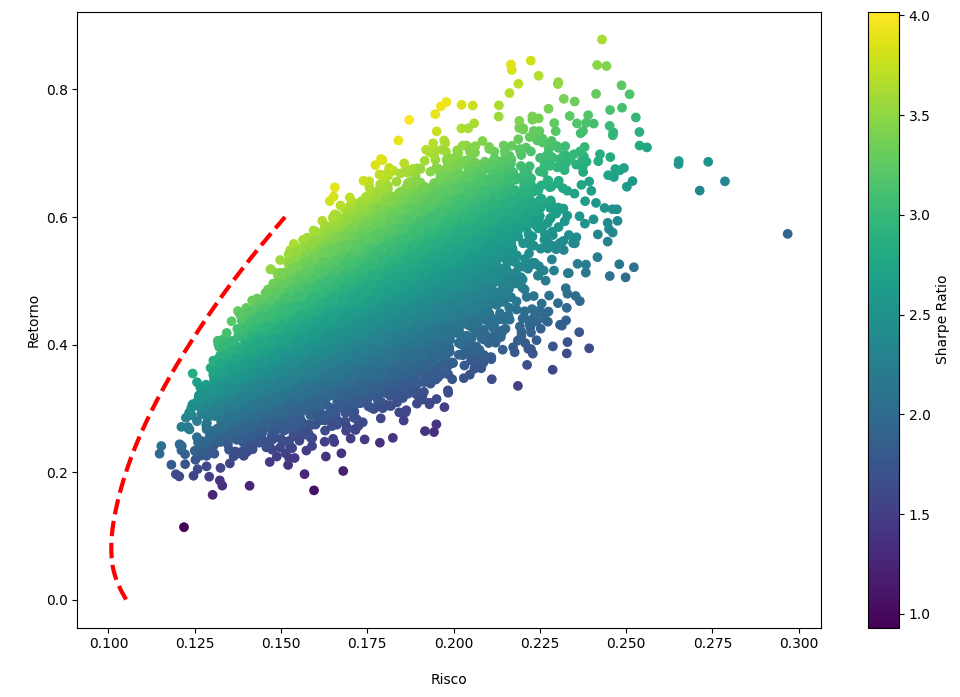

In [101]:
# Plot
plt.figure(figsize = (12,8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('\nRisco')
plt.ylabel('\nRetorno')
plt.plot(frontier_x, frontier_y, 'r--', linewidth = 3)
plt.show()

Conforme visto no gráfico acima, o retorno máximo que podemos obter é de cerca de 0,6 com um risco de cerca de 0,22 e o retorno mínimo que podemos obter é de cerca de 0,01 com um risco de cerca de 0,05.

Agora precisamos definir quanto alocar de cada asset financeiro em nosso portfólio para obter o maior retorno possível.

# Continuaremos no Próximo Capítulo

In [102]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [103]:
#%watermark -v -m

In [104]:
#%watermark --iversions

# Fim